In [225]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv


In [226]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [227]:
train.head()

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,85.792005,8067.786265,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19
1,939316,Astro Saga in the Cosmos,Documentary,Drama,Crime,2023,Japanese,USA,PG,6.178134e+06,...,80.437724,750.473993,24.262058,655.016451,4,91.867209,85.750069,1.601333e+06,195.900521,NaN
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,82.882434,77701.229657,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,NaN,...,80.022574,4411.172846,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,72.209335,11678.765250,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08


## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

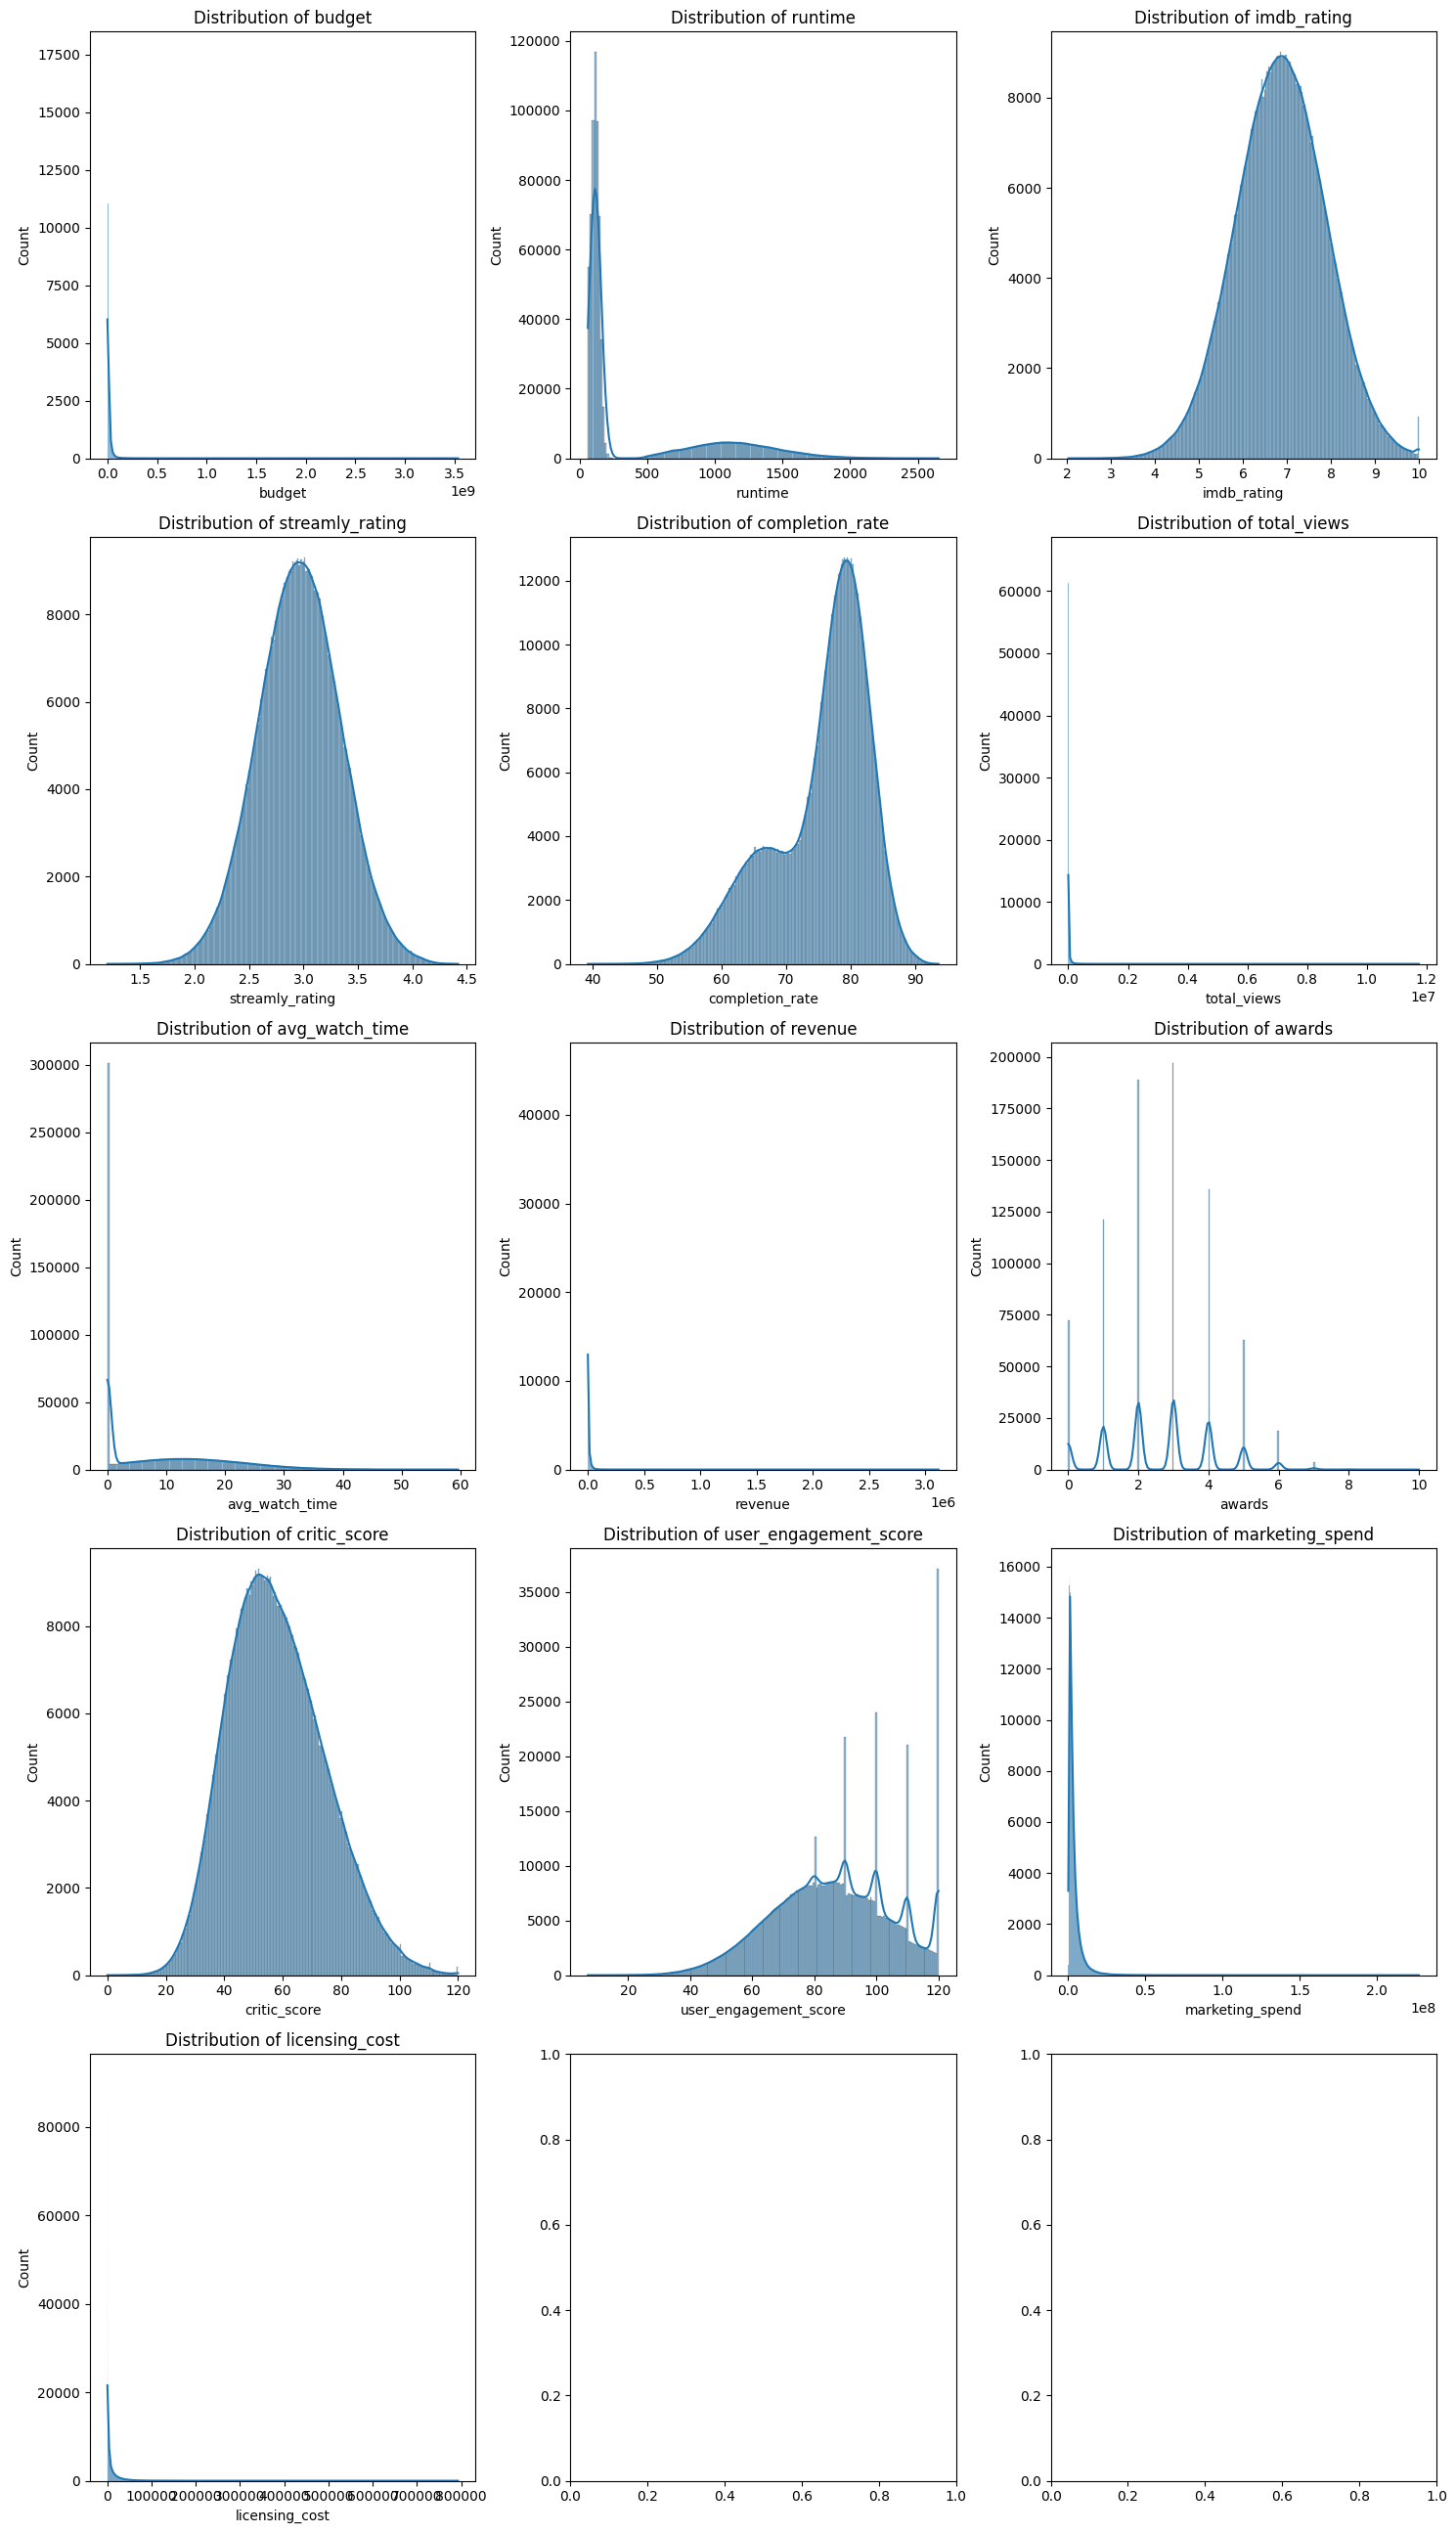

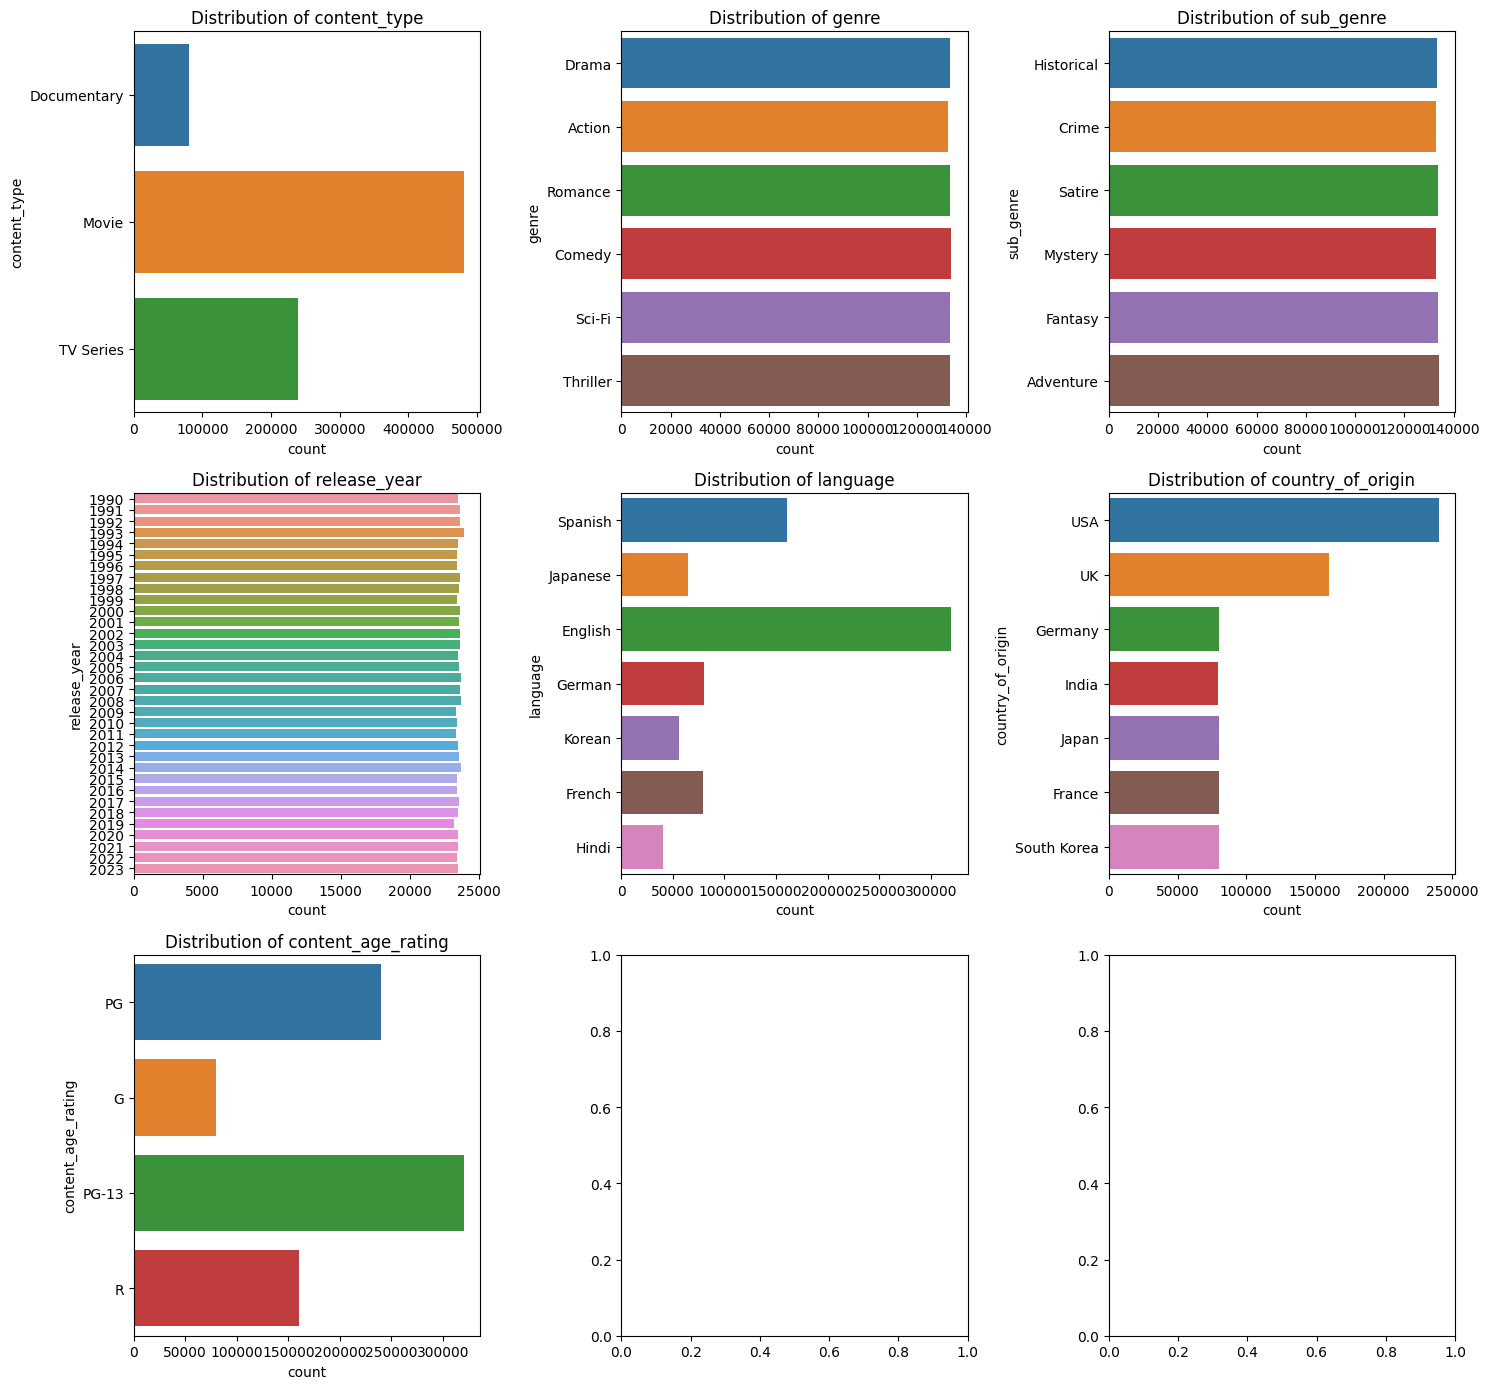

In [228]:
# Your code here, along with reasoning

#visualizing all the attributes
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical and categorical columns
numerical_cols = ['budget', 'runtime', 'imdb_rating', 'streamly_rating', 'completion_rate', 'total_views', 
                  'avg_watch_time', 'revenue', 'awards', 'critic_score', 'user_engagement_score', 'marketing_spend', 'licensing_cost']
categorical_cols = ['content_type', 'genre', 'sub_genre', 'release_year', 'language', 'country_of_origin', 'content_age_rating']

# Plotting numerical distributions
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, len(numerical_cols)*2))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Plotting categorical distributions
fig, axes = plt.subplots(len(categorical_cols)//3 + 1, 3, figsize=(15, len(categorical_cols)*2))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


Soome plots are highly skewed. Many have a lot of outliers.

## Missing values

content_id                   0
title                        0
content_type                 0
genre                        0
sub_genre                    0
release_year                 0
language                     0
country_of_origin            0
content_age_rating           0
budget                   40075
runtime                      0
imdb_rating              39934
streamly_rating              0
completion_rate              0
total_views                  0
avg_watch_time               0
revenue                  40081
awards                       0
critic_score             39642
user_engagement_score    40164
marketing_spend              0
licensing_cost               0
user_retention           39921
dtype: int64


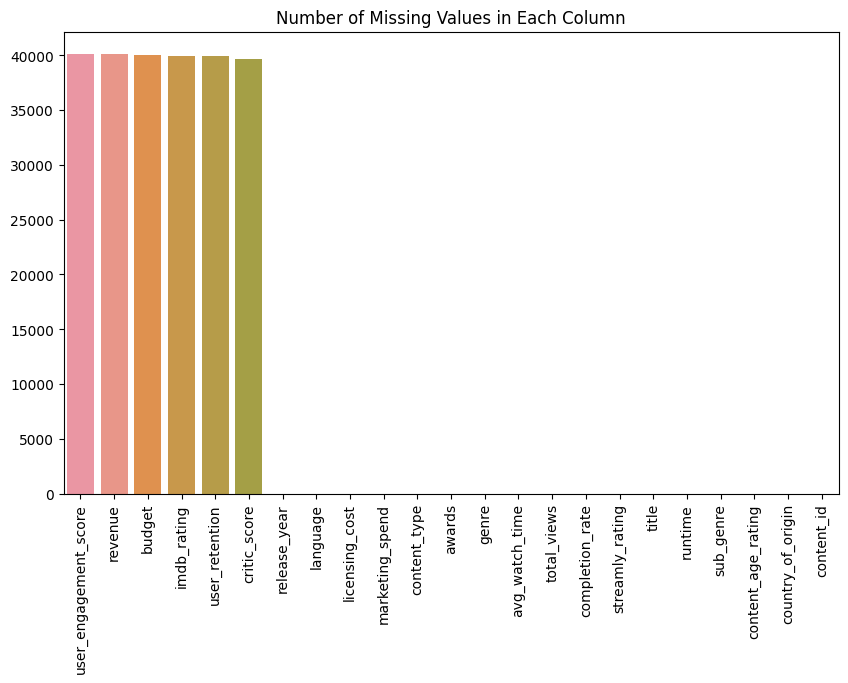

In [229]:
#checking for missing values to handle them
missing_values = train.isnull().sum()
print(missing_values)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing data
missing_data = train.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.title('Number of Missing Values in Each Column')
plt.show()

For revenue and budget, im imputing the missinig values with median(chose median as the data is skewed), also didnt choose to drop the missing rows, as the number of missing values is high.


In [230]:
# Median imputation for missing values in 'budget' and 'revenue'
train['budget'].fillna(train['budget'].median(), inplace=True)
train['revenue'].fillna(train['revenue'].median(), inplace=True)

# Verifying that missing values are imputed
missing_values = train[['budget', 'revenue']].isnull().sum()
print(missing_values)


budget     0
revenue    0
dtype: int64


/tmp/ipykernel_36/3063485699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['budget'].fillna(train['budget'].median(), inplace=True)
/tmp/ipykernel_36/3063485699.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

For critic_score and imbd ,im imputing missing values using mean(as both the distributions are approximately normal)

In [231]:
# Mean imputation for missing values in 'critic_score' and 'imdb_rating'
train['critic_score'].fillna(train['critic_score'].mean(), inplace=True)
train['imdb_rating'].fillna(train['imdb_rating'].mean(), inplace=True)
train['user_engagement_score'].fillna(train['user_engagement_score'].mean(), inplace=True)

# Verifying that missing values are imputed
missing_values = train[['critic_score', 'imdb_rating','user_engagement_score']].isnull().sum()
print(missing_values)


critic_score             0
imdb_rating              0
user_engagement_score    0
dtype: int64


/tmp/ipykernel_36/3659303360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['critic_score'].fillna(train['critic_score'].mean(), inplace=True)
/tmp/ipykernel_36/3659303360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Deleting the rows which have missing user_retention

In [232]:
# Dropping rows where 'user_retention' has missing values
train.dropna(subset=['user_retention'], inplace=True)

# Verifying if any missing values remain in 'user_retention'
missing_values = train['user_retention'].isnull().sum()
print(f"Missing values in user_retention: {missing_values}")

Missing values in user_retention: 0


In [233]:
#checking for missing values after imputing them
missing_values = train.isnull().sum()
print(missing_values)

content_id               0
title                    0
content_type             0
genre                    0
sub_genre                0
release_year             0
language                 0
country_of_origin        0
content_age_rating       0
budget                   0
runtime                  0
imdb_rating              0
streamly_rating          0
completion_rate          0
total_views              0
avg_watch_time           0
revenue                  0
awards                   0
critic_score             0
user_engagement_score    0
marketing_spend          0
licensing_cost           0
user_retention           0
dtype: int64


In [234]:
print(train.shape)

(760079, 23)


## correlogram

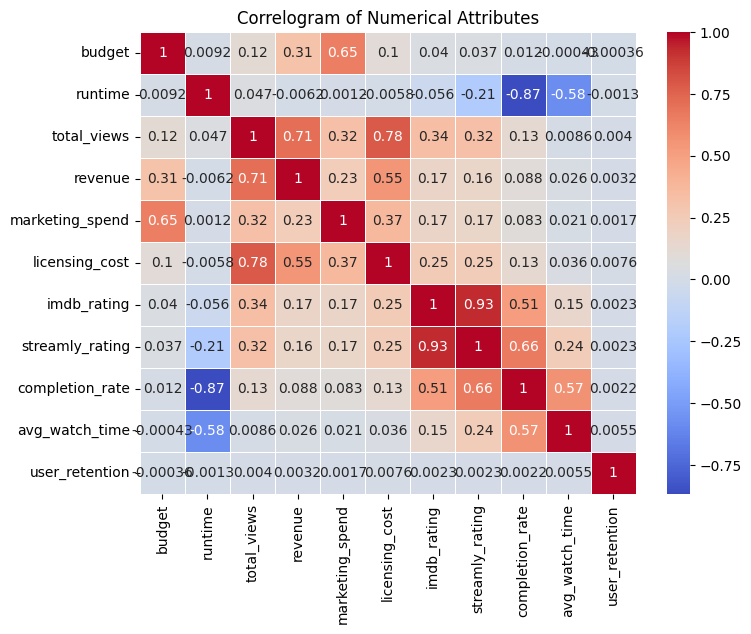

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to include in the correlogram
numerical_cols = ['budget', 'runtime', 'total_views', 'revenue', 'marketing_spend', 
                  'licensing_cost', 'imdb_rating','streamly_rating', 'completion_rate', 'avg_watch_time', 'user_retention']

# Calculating the correlation matrix
corr_matrix = train[numerical_cols].corr()

# Plotting the correlogram using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlogram of Numerical Attributes')
plt.show()


## Transforms
The distributions of some of attributes are highly skewed and not normal, hence im applying log transform on them so that the distributions become normal. This may also lead us to find attributes with correlate with our target variable

In [236]:
train['budget'] = np.log1p(train['budget'])
train['runtime'] = np.log1p(train['runtime'])
train['total_views'] = np.log1p(train['total_views'])
train['revenue'] = np.log1p(train['revenue'])
train['marketing_spend'] = np.log1p(train['marketing_spend'])
train['licensing_cost'] = np.log1p(train['licensing_cost'])
train['user_retention'] = np.log1p(train['user_retention'])


test['budget'] = np.log1p(test['budget'])
test['runtime'] = np.log1p(test['runtime'])
test['total_views'] = np.log1p(test['total_views'])
test['revenue'] = np.log1p(test['revenue'])
test['marketing_spend'] = np.log1p(test['marketing_spend'])
test['licensing_cost'] = np.log1p(test['licensing_cost'])

#some distributions have highly skewed values hence we do log transformation
# Display the first few rows to verify the transformations
train.head()

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,15.724202,...,85.792005,8.995758,20.718243,7.950175,7,87.991891,110.000000,14.640497,7.301367,45.340462
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,16.581150,...,82.882434,11.260639,10.776592,9.879077,3,66.761330,90.000000,15.478424,9.645897,54.549083
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,15.841815,...,80.022574,8.392123,11.376984,7.901815,4,58.300367,113.564852,16.714184,6.827219,35.053086
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,16.535913,...,72.209335,9.365613,6.219910,9.737381,1,47.234645,64.426039,15.386101,9.624780,19.352688
5,606526,Augmenting in the Quantum Foam: The Baroque Ad...,Movie,Comedy,Mystery,2000,Spanish,Germany,PG-13,15.910666,...,75.445773,9.315748,16.113432,8.681896,2,49.463357,74.638589,14.568857,8.752789,21.786915


## Plotting Distributions after log transforms

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

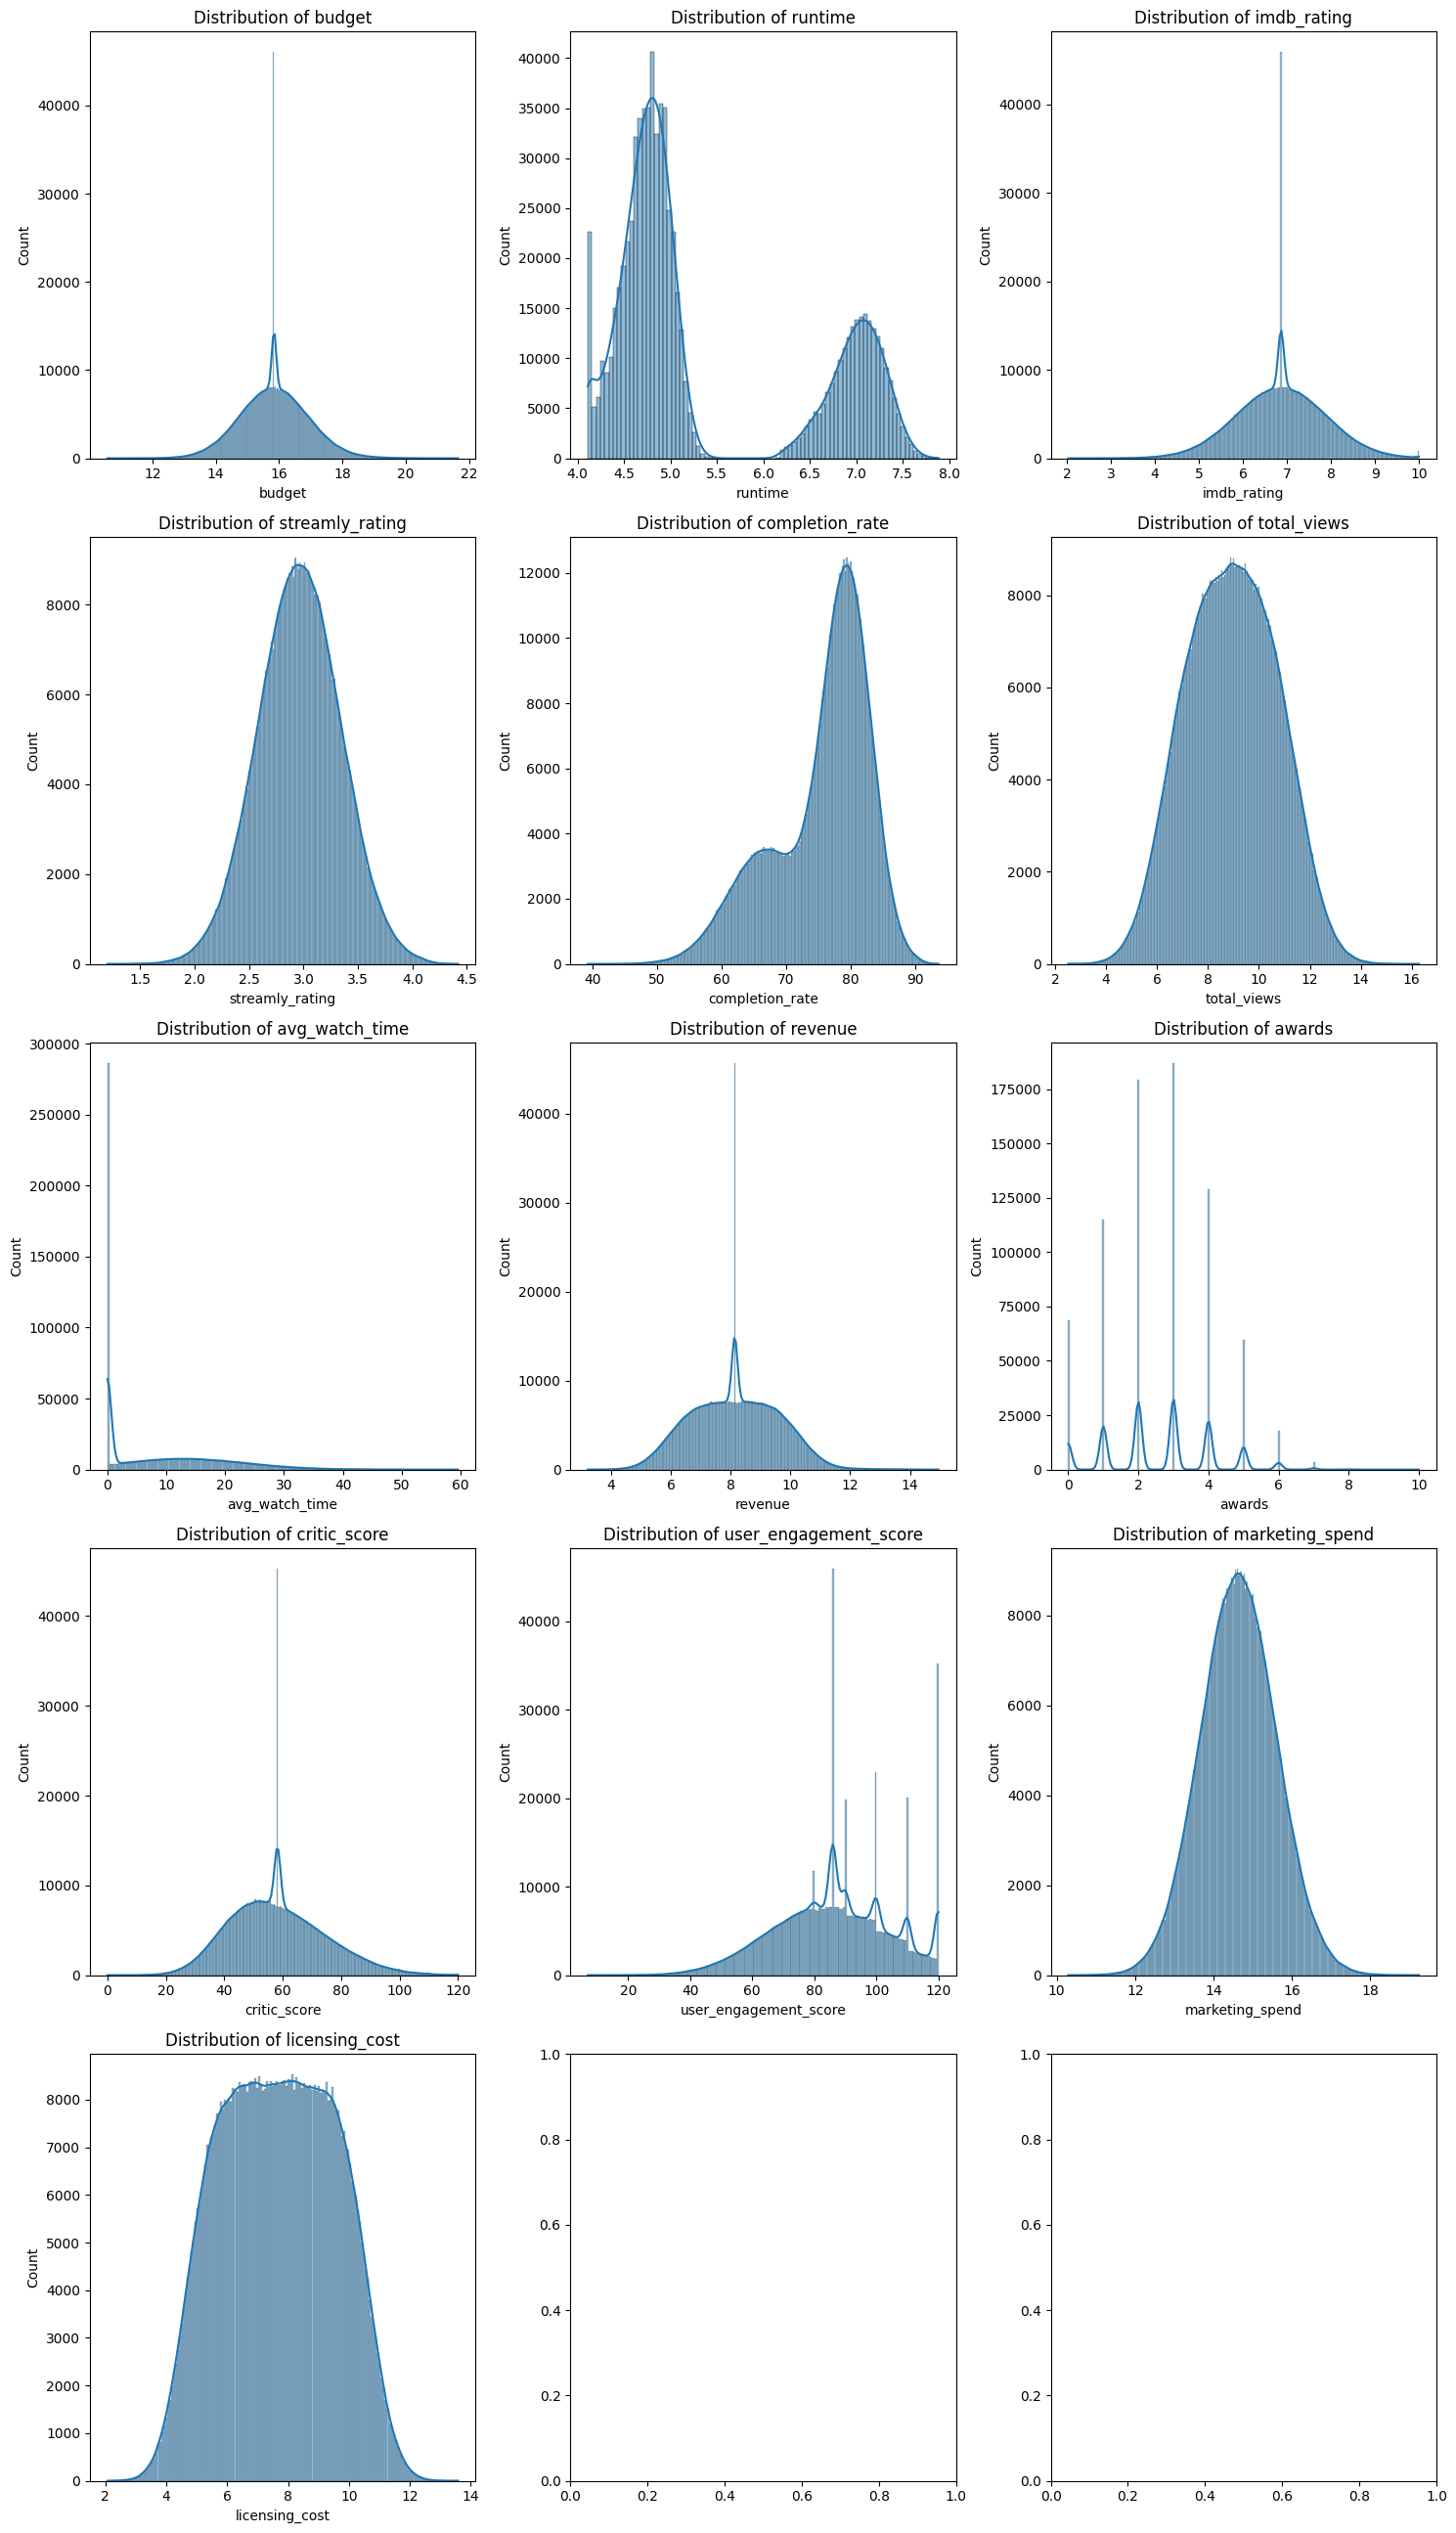

In [237]:
numerical_cols = ['budget', 'runtime', 'imdb_rating', 'streamly_rating', 'completion_rate', 'total_views', 
                  'avg_watch_time', 'revenue', 'awards', 'critic_score', 'user_engagement_score', 'marketing_spend', 'licensing_cost']


# Plotting numerical distributions
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, len(numerical_cols)*2))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



Plotting correlogram after applying log transforms on some attributes and on the target variable

user_engagement_score plot shows some values shot up, this can be due to people usually rounding off to the nearest tens while giving the score)

avg_watch_time is shot up at 0, this is weird, discrepency in the data.

Other distributions are approximately normal, except in few of them, a shot up in the mean/median as we imputed the missing values in them.

For runtime we see 2 peaks, one for movie, documentary runtimes, and the second peak is for TV-series runtime

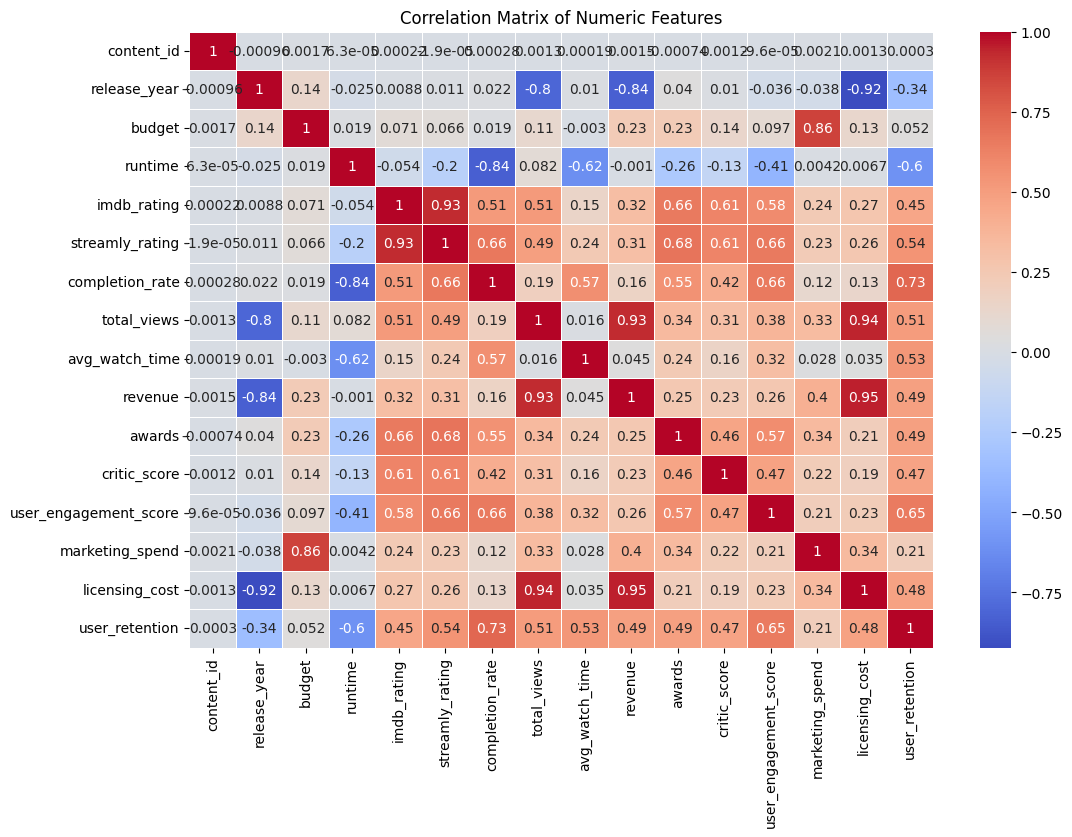

In [238]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])

# 2. Check for any missing data and handle it (if necessary)
numeric_train = numeric_train.dropna()

# 3. Calculate the correlation matrix for the numeric columns
plt.figure(figsize=(12, 8))
corr_matrix = numeric_train.corr()

# 4. Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Outlier analysis
Outliers can have significant influence on the prediction, and hence im visualizing and removing them.

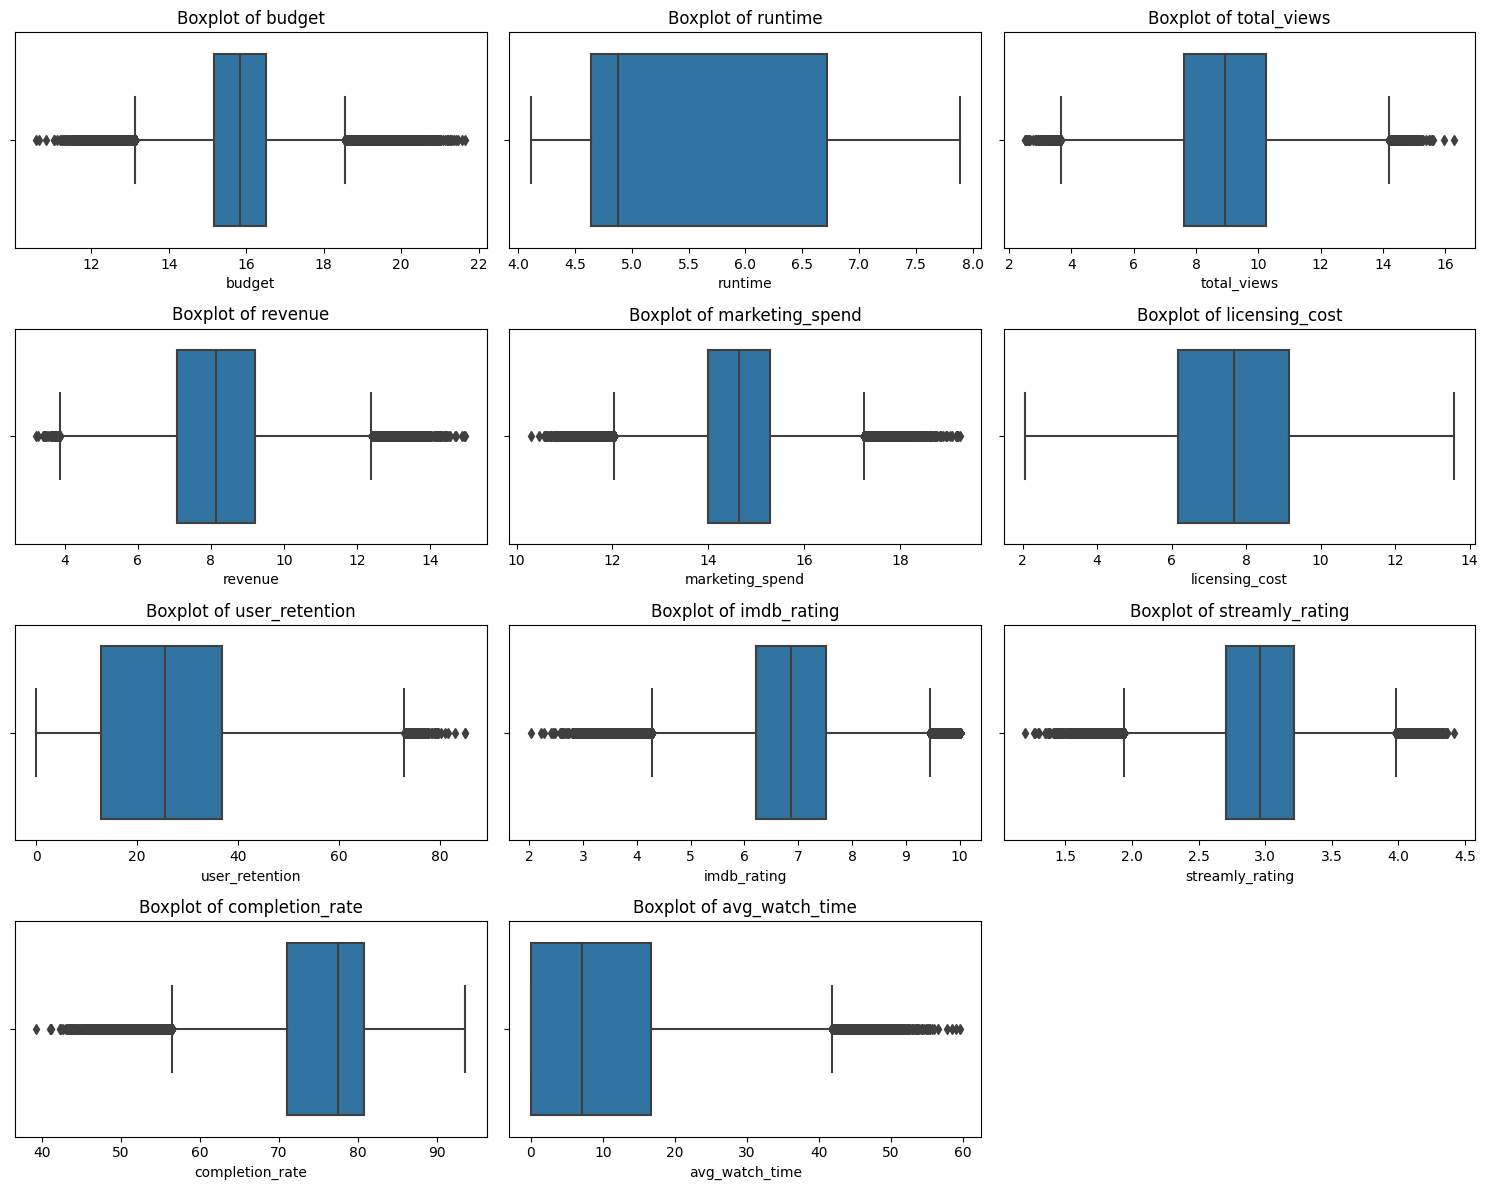

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_cols = ['budget', 'runtime', 'total_views', 'revenue', 'marketing_spend', 
                  'licensing_cost', 'user_retention', 'imdb_rating','streamly_rating', 'completion_rate', 'avg_watch_time']

# Set up the figure for multiple plots (3 per row)
plt.figure(figsize=(15, 12))

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i+1)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


streamly_rating, imbd_rating and critic_score is within the ranges eventhough the boxplot shows outliers; so they arent considered as outliers.
budget, revenue,avg_watch_time, tot_views have outliers will be removed using IQR method

In [240]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 3.0 * IQR  # Lower bound
    upper_bound = Q3 + 3.0 * IQR  # Upper bound
    # Filtering data where values are within the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to apply IQR-based outlier removal
numerical_cols = ['budget', 'total_views', 'revenue', 'marketing_spend', 'user_retention', 'streamly_rating', 'completion_rate', 'avg_watch_time']

# Applying the IQR-based outlier removal for each numerical column
for col in numerical_cols:
    train = remove_outliers_iqr(train, col)

# Checking the new shape of the dataframe after outlier removal
print("New shape of the dataframe after outlier removal:", train.shape)


New shape of the dataframe after outlier removal: (759999, 23)



# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

## Visualizing the correlations

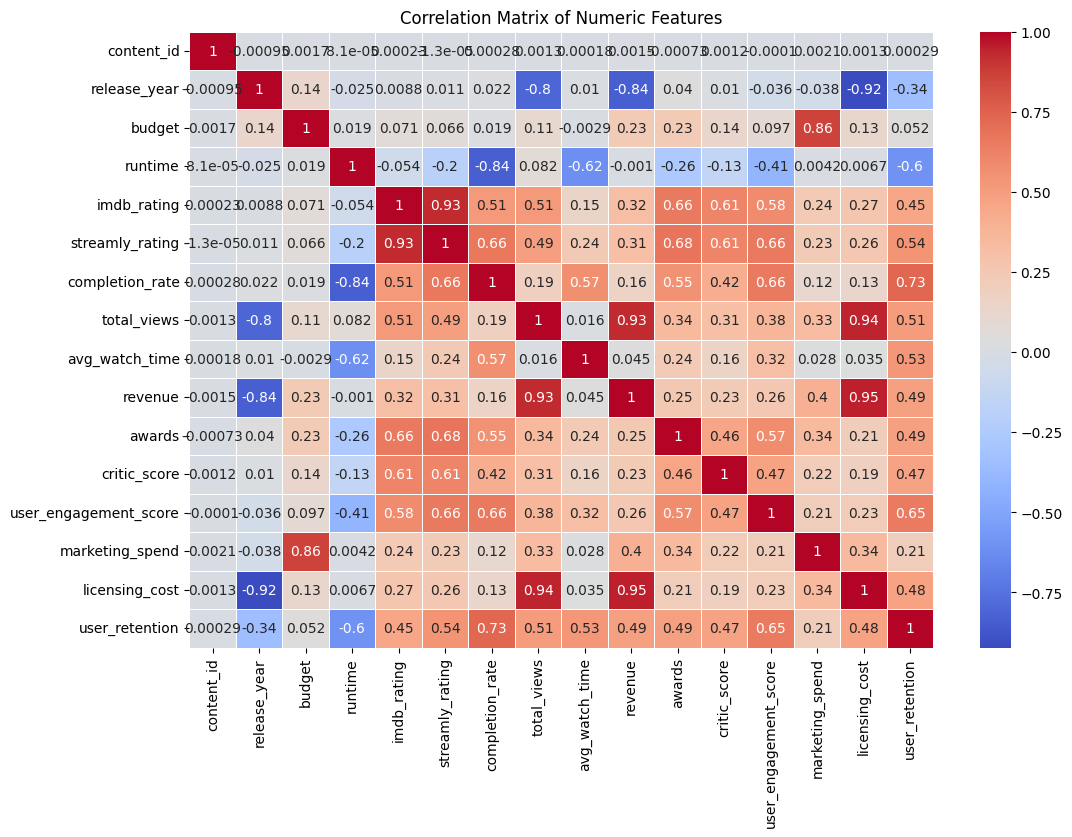

In [241]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])

# 2. Check for any missing data and handle it (if necessary)
numeric_train = numeric_train.dropna()

# 3. Calculate the correlation matrix for the numeric columns
plt.figure(figsize=(12, 8))
corr_matrix = numeric_train.corr()

# 4. Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


IMDB rating , streamly rating and critic_score are highly correlated(I will drop IMBD rating as it initially had many missing values, and ignore critic_score in the model building)

user_retention majorly positively correlates with completion_rate, user_engagement_score, streamy_rating, tot_views, avg_watch_time and awards, which makes sense. It negatively correlates with runtime(if its too log audience get bored) and release_year(older movies arent retained in the audience mind as much as newer ones).

In [242]:
train = train.drop(columns=['imdb_rating'])

## ROI metric
It is of significance cause we get to know how much ratio of revenue the movie gets back on the total budget it spent, which can have significant impact on user_retention

Correlation Matrix:
                  budget   revenue       ROI  user_retention
budget          1.000000  0.228391 -0.462522        0.052020
revenue         0.228391  1.000000  0.757538        0.485643
ROI            -0.462522  0.757538  1.000000        0.407384
user_retention  0.052020  0.485643  0.407384        1.000000


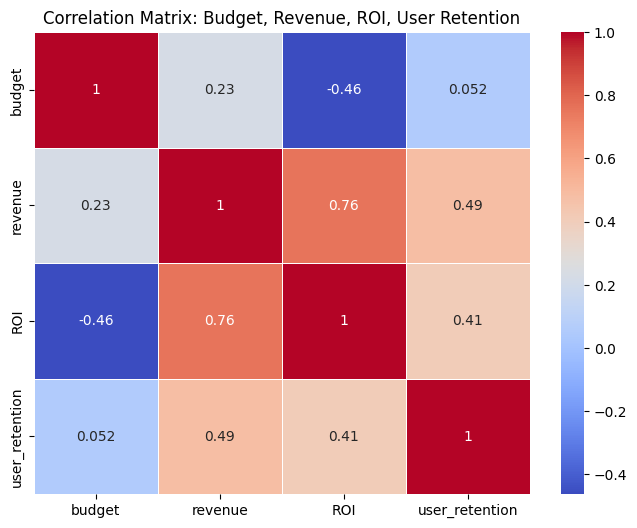

In [243]:
train['ROI'] = train['revenue'] - train['budget']

test['ROI'] = test['revenue'] - test['budget']
# Selecting the columns for correlation analysis
correlation_columns = ['budget', 'revenue', 'ROI', 'user_retention']

# Calculating the correlation matrix
corr_matrix = train[correlation_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Optionally, you can visualize it with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Budget, Revenue, ROI, User Retention')
plt.show()


As we can see by the correlogram, ROI is correlated to user_retentoin with a coefficien of about 0.41, which shows that it has a good amount of correlation.
By doing this, we got one more new feature ROI which captures info of both revenue and budget which can be used for the prediction. Budget's correlation with user_retention is low, hence we can ignore it for the feature selection of the model.

Revenue to views ratio is a new feature that im trying to create and check if it shows any patterns

Correlation Matrix:
                         revenue  total_views  revenue_to_views_ratio  \
revenue                 1.000000     0.930229               -0.098464   
total_views             0.930229     1.000000               -0.286819   
revenue_to_views_ratio -0.098464    -0.286819                1.000000   
user_retention          0.485643     0.507528               -0.142761   

                        user_retention  
revenue                       0.485643  
total_views                   0.507528  
revenue_to_views_ratio       -0.142761  
user_retention                1.000000  


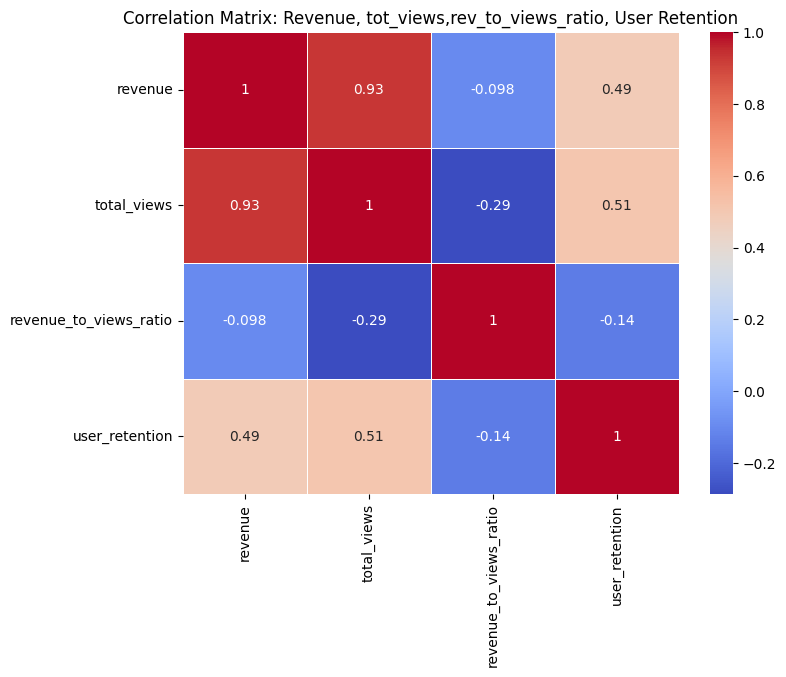

In [244]:
train['revenue_to_views_ratio'] = np.exp(train['revenue']) / np.exp(train['total_views'])

# Selecting the columns for correlation analysis
correlation_columns = ['revenue','total_views' ,'revenue_to_views_ratio', 'user_retention']

# Calculating the correlation matrix
corr_matrix = train[correlation_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Optionally, you can visualize it with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Revenue, tot_views,rev_to_views_ratio, User Retention')
plt.show()

revenue_to_views_ratio doesnt seem to be that good of a metric.

## Marketing Efficiency:
This feature measures how efficiently marketing spend translates into revenue.
Marketing Efficiency
=
Revenue/Marketing Spend


Correlation Matrix:
                       revenue  marketing_spend  marketing_efficiency  \
revenue               1.000000         0.401571              0.513609   
marketing_spend       0.401571         1.000000              0.228973   
marketing_efficiency  0.513609         0.228973              1.000000   
user_retention        0.485643         0.209016              0.232480   

                      user_retention  
revenue                     0.485643  
marketing_spend             0.209016  
marketing_efficiency        0.232480  
user_retention              1.000000  


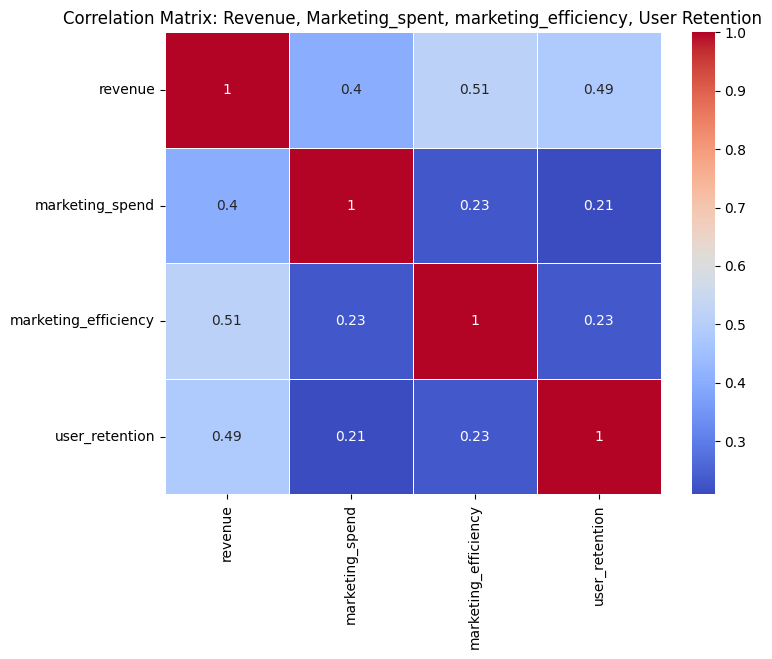

In [245]:
train['marketing_efficiency'] = np.exp(train['revenue']) / train['marketing_spend']
# Selecting the columns for correlation analysis
correlation_columns = ['revenue','marketing_spend' ,'marketing_efficiency', 'user_retention']

# Calculating the correlation matrix
corr_matrix = train[correlation_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Optionally, you can visualize it with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Revenue, Marketing_spent, marketing_efficiency, User Retention')
plt.show()

gives a 0.23 correlation to user_retention, seems like a good metric. 
**Marketing efficiency** is the new metric that I propose.

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

**Different genres ,sub-genres, coontent type, content age rating and language appeal to different audience segments. By analyzing the retention rates across genres, you can identify which content types are more likely to keep viewers engaged.**

In [246]:
train.head

<bound method NDFrame.head of         content_id                                              title  \
0           645543                             The Surreal Conspiracy   
2           280014                  Synthesizing the Eternal Artifact   
3           215181                      The Artifact of Savage Zenith   
4           241683                   Resonating the Spectral Prophecy   
5           606526  Augmenting in the Quantum Foam: The Baroque Ad...   
...            ...                                                ...   
799995      275603      Savage Mirage: A Post-Apocalyptic Tale (DN2X)   
799996      589165         The Nanotech Saga: A Gothic Journey (D0C3)   
799997      725081                    Fusion Zenith: A Dystopian Tale   
799998      708845      Hyper Paradox: A Post-Apocalyptic Tale (L6AD)   
799999      421922                             The Mystic Myth (E0NW)   

       content_type     genre   sub_genre  release_year  language  \
0       Documentary     

genre
Drama       25.196442
Romance     25.193136
Thriller    25.177680
Sci-Fi      25.175686
Action      25.128793
Comedy      25.119971
Name: user_retention, dtype: float64


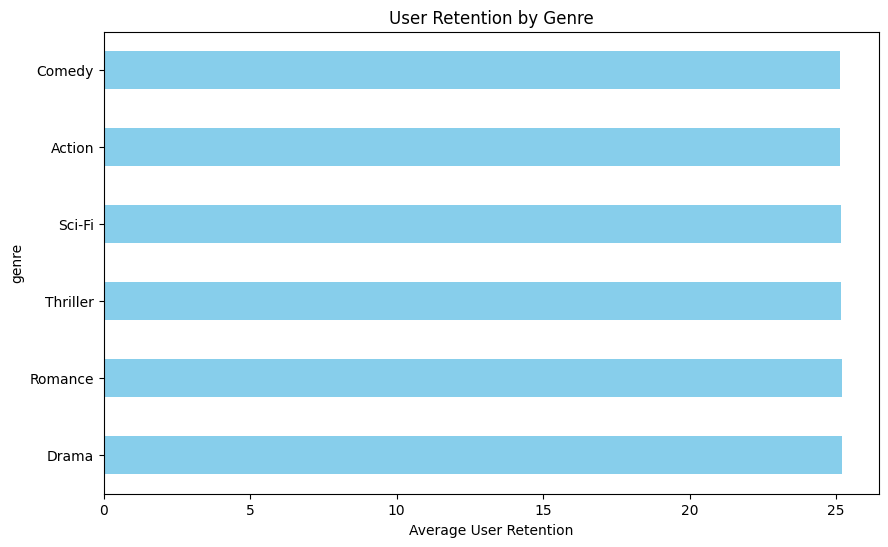

In [247]:
retention_by_genre = train.groupby('genre')['user_retention'].mean().sort_values(ascending=False)
print(retention_by_genre)
import matplotlib.pyplot as plt
retention_by_genre.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Average User Retention')
plt.title('User Retention by Genre')
plt.show()


sub_genre
Satire        25.187982
Adventure     25.180419
Crime         25.179359
Mystery       25.177016
Historical    25.153355
Fantasy       25.113529
Name: user_retention, dtype: float64


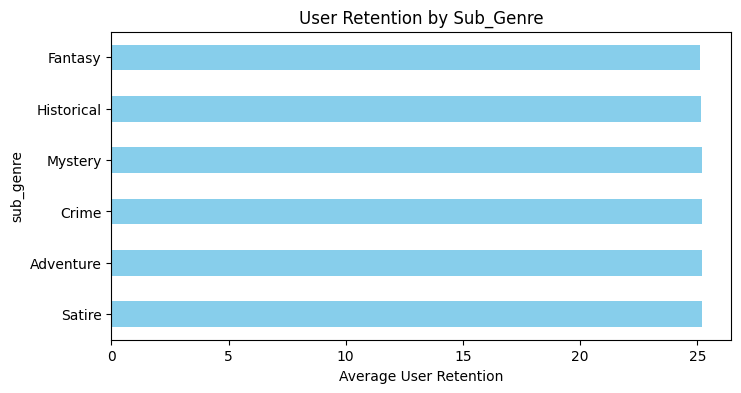

In [248]:
retention_by_sub_genre = train.groupby('sub_genre')['user_retention'].mean().sort_values(ascending=False)
print(retention_by_sub_genre)
retention_by_sub_genre.plot(kind='barh', figsize=(8,4), color='skyblue')
plt.xlabel('Average User Retention')
plt.title('User Retention by Sub_Genre')
plt.show()

Doesnt give much of an understanding, so I'll one-hot encode genre and sub-genre

content_type
Movie          31.261694
Documentary    31.190133
TV Series      10.941668
Name: user_retention, dtype: float64


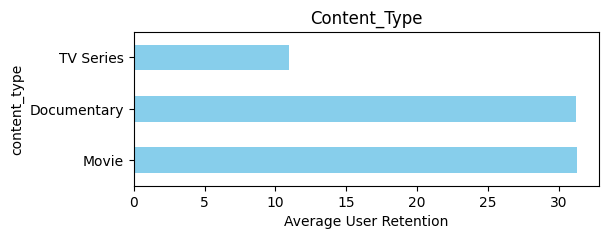

In [249]:
retention_by_sub_genre = train.groupby('content_type')['user_retention'].mean().sort_values(ascending=False)
print(retention_by_sub_genre)
retention_by_sub_genre.plot(kind='barh', figsize=(6,2), color='skyblue')
plt.xlabel('Average User Retention')
plt.title('Content_Type')
plt.show()

content_age_rating
G        39.702443
PG       31.070902
PG-13    22.436511
R        14.509437
Name: user_retention, dtype: float64


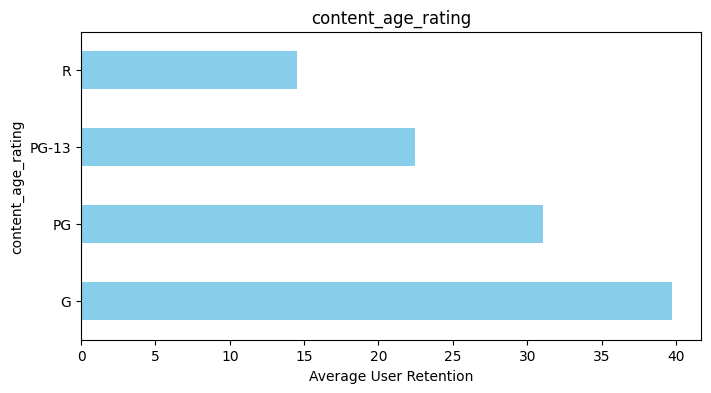

In [250]:
retention_by_sub_genre = train.groupby('content_age_rating')['user_retention'].mean().sort_values(ascending=False)
print(retention_by_sub_genre)
retention_by_sub_genre.plot(kind='barh', figsize=(8,4), color='skyblue')
plt.xlabel('Average User Retention')
plt.title('content_age_rating')
plt.show()

language
German      25.242682
French      25.223060
Korean      25.181423
Spanish     25.170040
Japanese    25.151595
English     25.133354
Hindi       25.131400
Name: user_retention, dtype: float64


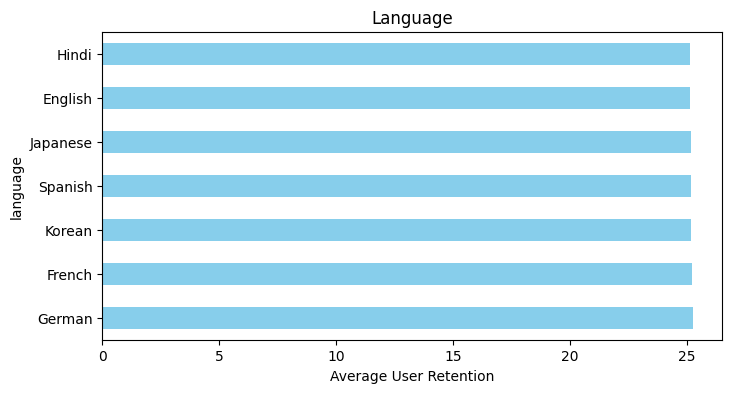

In [251]:
retention_by_sub_genre = train.groupby('language')['user_retention'].mean().sort_values(ascending=False)
print(retention_by_sub_genre)
retention_by_sub_genre.plot(kind='barh', figsize=(8,4), color='skyblue')
plt.xlabel('Average User Retention')
plt.title('Language')
plt.show()

country_of_origin
South Korea    25.203731
UK             25.184843
USA            25.180912
Germany        25.173824
India          25.134479
Japan          25.134196
France         25.094022
Name: user_retention, dtype: float64


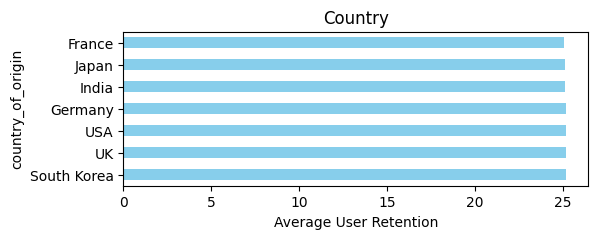

In [252]:
retention_by_sub_genre = train.groupby('country_of_origin')['user_retention'].mean().sort_values(ascending=False)
print(retention_by_sub_genre)
retention_by_sub_genre.plot(kind='barh', figsize=(6,2), color='skyblue')
plt.xlabel('Average User Retention')
plt.title('Country')
plt.show()

Cramer's V correalation for the categorical content variables

In [253]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Categorical variables
categorical_columns = ['content_type', 'genre', 'sub_genre','language', 'country_of_origin']

# Calculate Cramér's V between each categorical variable and user_retention
for col in categorical_columns:
    cramers_v_value = cramers_v(train[col], train['user_retention'])
    print(f"Cramér's V between {col} and user_retention: {cramers_v_value:.3f}")


Cramér's V between content_type and user_retention: 0.990
Cramér's V between genre and user_retention: 0.953
Cramér's V between sub_genre and user_retention: 0.953
Cramér's V between language and user_retention: 0.952
Cramér's V between country_of_origin and user_retention: 0.953


All these features show high correlation to user_retention

spearman's correlation for ordinal features like content_age_rating and release_year

In [254]:
age_rating_mapping = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4
}
train['content_age_rating_ordinal'] = train['content_age_rating'].map(age_rating_mapping)
test['content_age_rating_ordinal'] = test['content_age_rating'].map(age_rating_mapping)

ordinal_cols = ['release_year', 'content_age_rating_ordinal', 'user_retention']

# Calculate Spearman's Rank Correlation
spearman_corr = train[ordinal_cols].corr(method='spearman')

# Display the correlation matrix
print(spearman_corr)

                            release_year  content_age_rating_ordinal  \
release_year                    1.000000                    0.000464   
content_age_rating_ordinal      0.000464                    1.000000   
user_retention                 -0.338542                   -0.471190   

                            user_retention  
release_year                     -0.338542  
content_age_rating_ordinal       -0.471190  
user_retention                    1.000000  


from the plots, we can say that

genre: romance or drama

sub_genre: satire or adventure

content-type: Movie or documentary

Content_age_rating: G

language: German, French

country: South-Korea, UK, USA
(content_type and content_age_rating matter the most as we can see from the above plots)

**This type of content has more user_retentivity**

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

I am also going to one-hot encode content_type, and label-encode content_age_rating

In [255]:
train_encode = train.copy()
from sklearn.preprocessing import LabelEncoder
# Label Encoding for 'content_age_rating'
label_encoder = LabelEncoder()
train_encode['content_age_rating_encoded'] = label_encoder.fit_transform(train['content_age_rating'])

In [256]:
train_encode.head

<bound method NDFrame.head of         content_id                                              title  \
0           645543                             The Surreal Conspiracy   
2           280014                  Synthesizing the Eternal Artifact   
3           215181                      The Artifact of Savage Zenith   
4           241683                   Resonating the Spectral Prophecy   
5           606526  Augmenting in the Quantum Foam: The Baroque Ad...   
...            ...                                                ...   
799995      275603      Savage Mirage: A Post-Apocalyptic Tale (DN2X)   
799996      589165         The Nanotech Saga: A Gothic Journey (D0C3)   
799997      725081                    Fusion Zenith: A Dystopian Tale   
799998      708845      Hyper Paradox: A Post-Apocalyptic Tale (L6AD)   
799999      421922                             The Mystic Myth (E0NW)   

       content_type     genre   sub_genre  release_year  language  \
0       Documentary     

In [257]:

# List of categorical columns to encode
categorical_columns = ['content_type', 'genre', 'sub_genre', 'language']

# Apply One-Hot Encoding
train_encode = pd.get_dummies(train_encode, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
print(train_encode.head())

   content_id                                              title  \
0      645543                             The Surreal Conspiracy   
2      280014                  Synthesizing the Eternal Artifact   
3      215181                      The Artifact of Savage Zenith   
4      241683                   Resonating the Spectral Prophecy   
5      606526  Augmenting in the Quantum Foam: The Baroque Ad...   

   release_year country_of_origin content_age_rating     budget   runtime  \
0          2013               USA                 PG  15.724202  4.718499   
2          2000               USA                 PG  16.581150  4.875197   
3          2019                UK                  G  15.841815  5.099866   
4          1993               USA              PG-13  16.535913  4.948760   
5          2000           Germany              PG-13  15.910666  4.795791   

   streamly_rating  completion_rate  total_views  ...  sub_genre_Fantasy  \
0         3.636652        85.792005     8.995758  ..

Checking the correlation of these encoded features with user_retention to check whether they should be retained or not

In [259]:
# Filter the dataset to include only the one-hot encoded features and user_retention
relevant_columns = ['user_retention'] + [col for col in train_encode.columns if col.startswith(('content_type_', 'genre_', 'sub_genre_', 'language_'))]
filtered_df = train_encode[relevant_columns]

# Calculate the correlation matrix for these filtered features
correlation_matrix = filtered_df.corr()

# Extract correlations with user_retention
user_retention_corr = correlation_matrix['user_retention'].sort_values(ascending=False)

# Display the correlations with user_retention
print(user_retention_corr)


user_retention            1.000000
content_type_Movie        0.472958
language_German           0.001632
language_French           0.001214
genre_Drama               0.000882
genre_Romance             0.000788
sub_genre_Satire          0.000643
sub_genre_Crime           0.000397
genre_Thriller            0.000351
sub_genre_Mystery         0.000332
genre_Sci-Fi              0.000294
language_Korean           0.000280
language_Spanish          0.000151
language_Japanese        -0.000256
sub_genre_Historical     -0.000337
language_Hindi           -0.000493
genre_Comedy             -0.001285
sub_genre_Fantasy        -0.001465
content_type_TV Series   -0.588621
Name: user_retention, dtype: float64


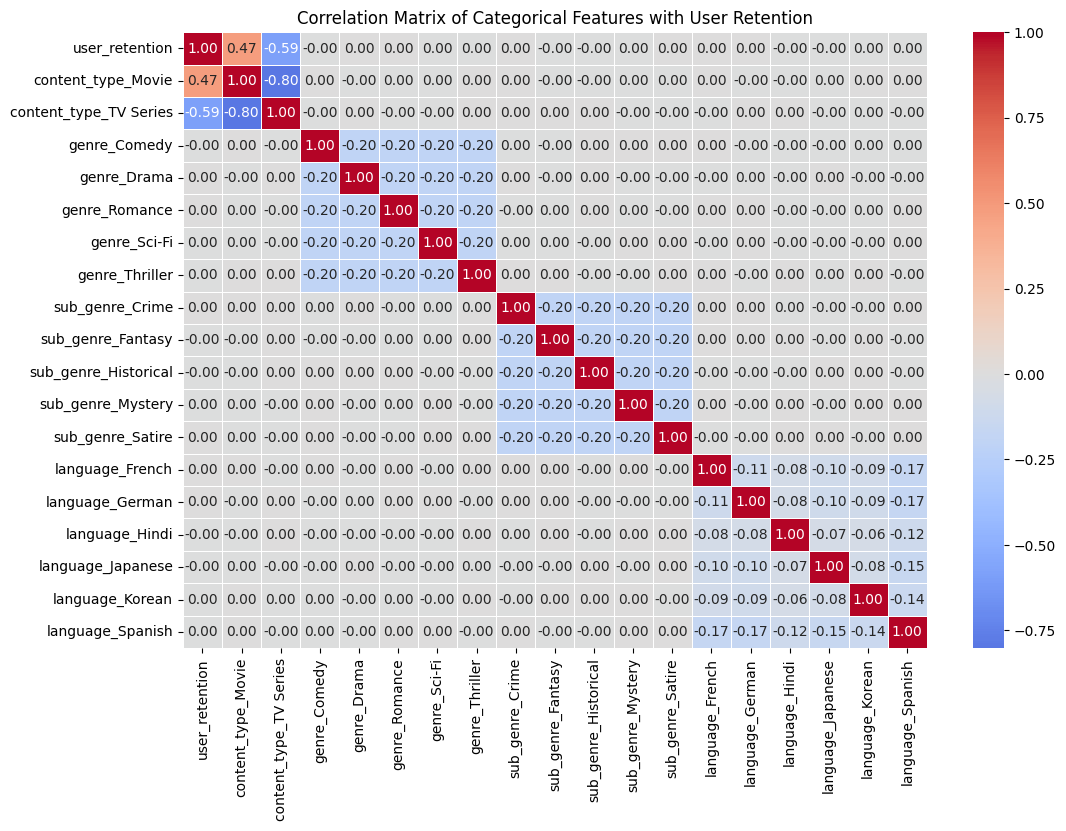

In [260]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Categorical Features with User Retention')
plt.show()

Here we see that genre, sub_genre and language dont correlate with user_retention, so I'll drop them

content_type does, so lets retain it

In [261]:
#train_encode = train.copy()
train= train.drop(columns=['genre', 'sub_genre', 'language'])
test= test.drop(columns=['genre', 'sub_genre', 'language'])
# Display the first few rows of the updated dataframe to confirm
print(train.head())

   content_id                                              title content_type  \
0      645543                             The Surreal Conspiracy  Documentary   
2      280014                  Synthesizing the Eternal Artifact        Movie   
3      215181                      The Artifact of Savage Zenith        Movie   
4      241683                   Resonating the Spectral Prophecy        Movie   
5      606526  Augmenting in the Quantum Foam: The Baroque Ad...        Movie   

   release_year country_of_origin content_age_rating     budget   runtime  \
0          2013               USA                 PG  15.724202  4.718499   
2          2000               USA                 PG  16.581150  4.875197   
3          2019                UK                  G  15.841815  5.099866   
4          1993               USA              PG-13  16.535913  4.948760   
5          2000           Germany              PG-13  15.910666  4.795791   

   streamly_rating  completion_rate  ...  awards  

After one-hot-encoding content_type, i saw that content_TV show had the most correlation with user_retention. Hence I'll keep that and remove the other one-hot-encoded columns of content_type(as they have high correlation between eachother, have to drop them)

In [262]:
categorical_columns = ['content_type']

# Apply One-Hot Encoding
train= pd.get_dummies(train, columns=categorical_columns, drop_first=True)
train= train.drop(columns=['content_type_Movie'])

test= pd.get_dummies(test, columns=categorical_columns, drop_first=True)
test = test.drop(columns=['content_type_Movie'])
# Display the first few rows of the encoded dataframe
print(train.head())

   content_id                                              title  \
0      645543                             The Surreal Conspiracy   
2      280014                  Synthesizing the Eternal Artifact   
3      215181                      The Artifact of Savage Zenith   
4      241683                   Resonating the Spectral Prophecy   
5      606526  Augmenting in the Quantum Foam: The Baroque Ad...   

   release_year country_of_origin content_age_rating     budget   runtime  \
0          2013               USA                 PG  15.724202  4.718499   
2          2000               USA                 PG  16.581150  4.875197   
3          2019                UK                  G  15.841815  5.099866   
4          1993               USA              PG-13  16.535913  4.948760   
5          2000           Germany              PG-13  15.910666  4.795791   

   streamly_rating  completion_rate  total_views  ...  critic_score  \
0         3.636652        85.792005     8.995758  ...    

**1. Mallows' Cp**
Mallows' Cp helps balance model fit and complexity. It compares the model’s fit to the true model’s fit. Ideally, Cp should be close to the number of predictors plus the constant term (p + 1). A lower Cp indicates a better balance between fit and simplicity.

**2. Adjusted R-squared**

Adjusted R-squared adjusts R-squared for the number of predictors. It helps compare models with different numbers of predictors. A higher value indicates a better fit, accounting for model complexity.

**3. Akaike Information Criterion (AIC)**
AIC measures model quality by balancing fit and complexity. Lower AIC values indicate better models. It penalizes for the number of predictors to avoid overfitting.

**4. Bayesian Information Criterion (BIC)**
BIC is similar to AIC but applies a stronger penalty for model complexity, especially with large samples. Lower BIC values suggest better models.

**5. Cross-Validation**
Cross-validation assesses model performance by partitioning data into subsets and validating the model on these. It provides a measure of how well the model generalizes to new data.

**6. Residual Sum of Squares (RSS)**
RSS measures the total deviation of predicted values from actual values. Lower RSS indicates a better model fit.

**7. Information Criterion for Model Selection (ICMS)**
ICMS is a general term for criteria like AIC and BIC that balance fit and complexity. It helps in model selection by evaluating both goodness of fit and model simplicity.

These metrics help evaluate and select models by balancing accuracy, complexity, and generalizability.

# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

Rsquared: does Not Penalize Complexity, always increases with the addition of more predictors, even if they are not meaningful. This can lead to overfitting, where the model fits the training data very well but performs poorly on new data.It also does Not Account for Outliers making the model appear better than it actually is. Hence it alone isnt an appropriate metric for this problem, however including othermetrics as well with this is a good idea.

Other metric that can be used:
Adjusted R-squared accounts for the number of predictors in the model. It decreases if the additional predictors do not improve the model significantly.
Usefulness: Helps prevent overfitting by considering the complexity of the model.

Mean Squared Error (MSE)
MSE measures the average squared difference between actual and predicted values. Lower MSE indicates a better fit.
Usefulness: Provides a direct measure of prediction error and is sensitive to large errors.
Root Mean Squared Error (RMSE) can also be used.

Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)
AIC and BIC balance model fit with complexity, penalizing for more predictors.
Usefulness: Useful for model selection by considering both fit and simplicity.

Based on the correlogram, I,ve identifies a few important features which are:'content_age_rating_ordinal', 'content_type_TV Series', 'user_engagement_score', 'streamly_rating', 'completion_rate', 'avg_watch_time', 'runtime', Ive decided to use these features for my prediction model.

I've chosen XGBoost as my model.
It works by combining multiple decision trees to make accurate predictions. It builds decision trees sequentially, with each tree trying to correct the errors of the previous ones.
It gives High Accuracy,and is efficient(Fast training and scalable for large datasets). It includes regularization and helps identify key features for better model interpretation.
Hence this is my model choice.

In [263]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the features for the model
features = ['content_age_rating_ordinal', 'content_type_TV Series', 'user_engagement_score', 
            'streamly_rating', 'completion_rate', 'avg_watch_time','runtime']

# Define X (features) and y (target) for the training dataset
X_train = train[features]
y_train = train['user_retention']

X_test = test[features]

# Initialize and train the XGBoost Regressor model
model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions on the training set and test set
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb = model_xgb.predict(X_test) 

# Evaluate the model performance on the training set
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

# Print the results
print(f"XGBoost Regressor - Training Set MSE: {mse_train_xgb}")
print(f"XGBoost Regressor - Training Set R^2: {r2_train_xgb}")

# Show predictions on the test set (optional)
print("XGBoost Regressor - Test Set Predictions (no evaluation since user_retention is not available):")
print(y_pred_test_xgb)


XGBoost Regressor - Training Set MSE: 57.915413124186514
XGBoost Regressor - Training Set R^2: 0.7682030873706339
XGBoost Regressor - Test Set Predictions (no evaluation since user_retention is not available):
[36.296627  45.398754  38.283993  ... 24.35236   16.0742     2.0337584]


In [264]:
# Your code here, along with reasoning

In [265]:
submission = pd.DataFrame()
submission["title"] = test["title"]
submission["user_retention"] = y_pred_test_xgb

submission.to_csv('submission.csv', index=False)
#the submission template
print(submission.head())

                                               title  user_retention
0                  Pulsating the Eternal Tale (AG4P)       36.296627
1                   Arcane Legend: A Spy Tale (NFVT)       45.398754
2                           The Neon Grimoire (9RHA)       38.283993
3  Pulsating through the Dreamscape: The Mega Mirage       20.048838
4                            The Turbo Enigma (D23S)       36.659626


## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 